In [28]:
import sqlite3
import os
import matplotlib.pyplot as plt
conn = sqlite3.connect(os.path.abspath('final.db'))
cur = conn.cursor()


In [26]:
# date from WeeklyEconomicIndex
cur.execute("SELECT date FROM WeeklyEconomicIndex")
date_data = cur.fetchall()

import datetime
date_ls = []
for i in date_data:
    date = i[0]
    date_ls.append(datetime.datetime.strptime(date, "%Y-%m-%d"))
date_ls

[datetime.datetime(2008, 1, 6, 0, 0),
 datetime.datetime(2008, 1, 13, 0, 0),
 datetime.datetime(2008, 1, 20, 0, 0),
 datetime.datetime(2008, 1, 27, 0, 0),
 datetime.datetime(2008, 2, 3, 0, 0),
 datetime.datetime(2008, 2, 10, 0, 0),
 datetime.datetime(2008, 2, 17, 0, 0),
 datetime.datetime(2008, 2, 24, 0, 0),
 datetime.datetime(2008, 3, 2, 0, 0),
 datetime.datetime(2008, 3, 9, 0, 0),
 datetime.datetime(2008, 3, 16, 0, 0),
 datetime.datetime(2008, 3, 23, 0, 0),
 datetime.datetime(2008, 3, 30, 0, 0),
 datetime.datetime(2008, 4, 6, 0, 0),
 datetime.datetime(2008, 4, 13, 0, 0),
 datetime.datetime(2008, 4, 20, 0, 0),
 datetime.datetime(2008, 4, 27, 0, 0),
 datetime.datetime(2008, 5, 4, 0, 0),
 datetime.datetime(2008, 5, 11, 0, 0),
 datetime.datetime(2008, 5, 18, 0, 0),
 datetime.datetime(2008, 5, 25, 0, 0),
 datetime.datetime(2008, 6, 1, 0, 0),
 datetime.datetime(2008, 6, 8, 0, 0),
 datetime.datetime(2008, 6, 15, 0, 0),
 datetime.datetime(2008, 6, 22, 0, 0),
 datetime.datetime(2008, 6, 29, 0

In [30]:
# weekly economic index from WeeklyEconomicIndex
cur.execute("SELECT index_value FROM WeeklyEconomicIndex")
ls = cur.fetchall()
index_data_ls = []
for i in ls:
    index = i[0]
    index_data_ls.append(index)

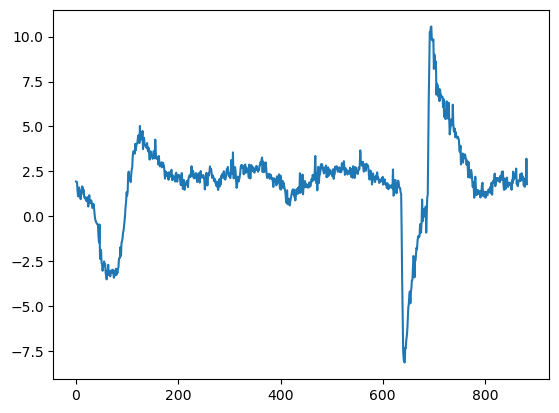

In [32]:
plt.plot(index_data_ls)

In [ ]:
# Visualization 1


In [ ]:
# Visualization 2

In [ ]:
# Visualization 3